In [1]:
import tensorflow as tf
import keras

In [2]:
tf.__version__


'2.17.1'

In [3]:
keras.__version__

'3.5.0'

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
data=pd.read_csv('wine.csv')

In [9]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# New Section

Q3. Check for null values, identify categorical variables, and encode them.

In [10]:
null_values=data.isnull().sum()
null_values


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [11]:
categorical_columns=data.select_dtypes(['object']).columns.to_list()
categorical_columns

['quality']

In [12]:
encoded_data=pd.get_dummies(data,columns=['quality'],drop_first=True)

In [13]:
encoded_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,False


Q4. Separate the features and target variables from the dataframe.

In [14]:
X=encoded_data.drop('quality_good',axis=1)
y=encoded_data['quality_good']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Q5. Perform a train-test split and divide the data into training, validation, and test datasets.

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.2,random_state=42)
## divideing into validation dataset

X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)

Q6. Perform scaling on the dataset.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_val_scaled=scaler.fit_transform(X_val)
X_test_scaled=scaler.fit_transform(X_test)


In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Q7. Create at least 2 hidden layers and an output layer for the binary categorical variables.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model=Sequential()

In [22]:
#first hidden layer
model.add(Dense(64,input_shape=(X_train_scaled.shape[1],),activation='relu'))
## second hidden layer
model.add(Dense(32,activation='relu'))

##output layer
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

Q9. Implement a TensorBoard callback to visualize and monitor the model's training process.

In [32]:
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping,ModelCheckpoint
import datetime

In [29]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorborad_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

history=model.fit(X_train_scaled,y_train,validation_data=(X_val_scaled,y_val),
                  epochs=10,
                  batch_size=32,
                  callbacks=[tensorborad_callback]
                  )

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5532 - loss: 0.7031 - val_accuracy: 0.6562 - val_loss: 0.5772
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7286 - loss: 0.5584 - val_accuracy: 0.6812 - val_loss: 0.5470
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7418 - loss: 0.5228 - val_accuracy: 0.7063 - val_loss: 0.5440
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7552 - loss: 0.5012 - val_accuracy: 0.6875 - val_loss: 0.5454
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7570 - loss: 0.5017 - val_accuracy: 0.7000 - val_loss: 0.5412
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7498 - loss: 0.5037 - val_accuracy: 0.6938 - val_loss: 0.5351
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7696 - loss: 0.4843 - val_accuracy: 0.7000 - val_loss: 0.5353
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7848 - loss: 0.4674 - val_accuracy: 0.7188 - val_loss

Q10. Use Early Stopping to prevent overfitting by monitoring a chosen metric and stopping the training if
no improvement is observed.

In [31]:
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

history=model.fit(X_train_scaled,y_train,
                  validation_data=(X_val_scaled,y_val),
                  epochs=50,
                  batch_size=32,
                  callbacks=[early_stopping]
                  )

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7820 - loss: 0.4468 - val_accuracy: 0.7250 - val_loss: 0.5282
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7886 - loss: 0.4571 - val_accuracy: 0.7125 - val_loss: 0.5321
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7980 - loss: 0.4498 - val_accuracy: 0.7125 - val_loss: 0.5265
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7847 - loss: 0.4511 - val_accuracy: 0.7250 - val_loss: 0.5299
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7741 - loss: 0.4622 - val_accuracy: 0.7188 - val_loss: 0.5223
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7984 - loss: 0.4494 - val_accuracy: 0.7125 - val_loss: 0.5257
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7793 - loss: 0.4537 - val_accuracy: 0.7250 - val_loss: 0.5226
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8264 - loss: 0.4000 - val_accuracy: 0.7125 - val_loss

Q11. Implement a ModelCheckpoint callback to save the best model based on a chosen metric during
training.

In [34]:
checkpoint_callback=ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

history=model.fit(X_train_scaled,y_train,
                  validation_data=(X_val_scaled,y_val),
                  epochs=50,
                  batch_size=32,
                  callbacks=[checkpoint_callback]
                  )

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7950 - loss: 0.4559
Epoch 1: val_loss improved from inf to 0.52318, saving model to best_model.keras
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7948 - loss: 0.4557 - val_accuracy: 0.7250 - val_loss: 0.5232
Epoch 2/50
38/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7795 - loss: 0.4528
Epoch 2: val_loss did not improve from 0.52318
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7803 - loss: 0.4522 - val_accuracy: 0.7250 - val_loss: 0.5253
Epoch 3/50
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7897 - loss: 0.4380
Epoch 3: val_loss did not improve from 0.52318
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7896 - loss: 0.4382 - val_accuracy: 0.7188 - val_loss: 0.5239
Epoch 4/50
34/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7962 - loss: 0.4244
Epoch 4: val_loss did not improve from 0.52318
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7954 - loss: 0.4271 - val_accuracy: 0.7063 

Q12. Print the model summary.

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,645 (33.77 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,764 (22.52 KB)

Q13. Use binary cross-entropy as the loss function, Adam optimizer, and include the metric ['accuracy'].

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
history = model.fit(
    X_train_scaled,    # Training features
    y_train,           # Training labels
    validation_data=(X_val_scaled, y_val),  # Validation set
    epochs=10,         # Number of training epochs
    batch_size=32      # Batch size
)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8730 - loss: 0.3087 - val_accuracy: 0.7625 - val_loss: 0.5230
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8880 - loss: 0.3097 - val_accuracy: 0.7437 - val_loss: 0.5290
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8620 - loss: 0.3197 - val_accuracy: 0.7563 - val_loss: 0.5323
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8674 - loss: 0.3081 - val_accuracy: 0.7500 - val_loss: 0.5384
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8803 - loss: 0.2889 - val_accuracy: 0.7563 - val_loss: 0.5234
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8699 - loss: 0.3010 - val_accuracy: 0.7563 - val_loss: 0.5254
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8892 - loss: 0.2868 - val_accuracy: 0.7500 - val_loss: 0.5300
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8887 - loss: 0.2839 - val_accuracy: 0.7625 - val_loss:

In [40]:
print("Loss:", model.loss)
print("Optimizer:", model.optimizer)
print("Metrics:", model.metrics_names)

Loss: binary_crossentropy
Optimizer: <keras.src.optimizers.adam.Adam object at 0x7927f88a8cd0>
Metrics: ['loss', 'compile_metrics']


Q17. Store the model's training history as a Pandas DataFrame.

In [41]:


# Assuming 'history' is the object returned by model.fit()
history_df = pd.DataFrame(history.history)

# Display the first few rows of the DataFrame
print("Training History:\n", history_df.head())

# Optionally, save to a CSV file for future reference
history_df.to_csv('training_history.csv', index=False)

Training History:
    accuracy      loss  val_accuracy  val_loss
0  0.863956  0.318359       0.76250  0.523004
1  0.882721  0.305219       0.74375  0.528996
2  0.875684  0.302626       0.75625  0.532274
3  0.872557  0.302682       0.75000  0.538401
4  0.872557  0.301196       0.75625  0.523368


Q18. Plot the model's training history.

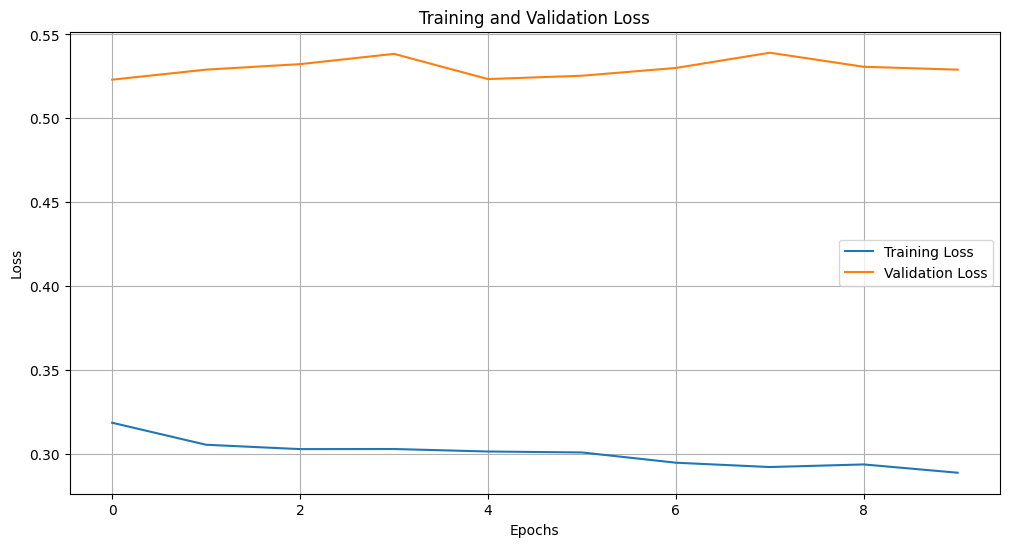

In [43]:
import matplotlib.pyplot as plt
history_df = pd.DataFrame(history.history)

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


Q19. Evaluate the model's performance using the test data.

In [44]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8113 - loss: 0.4956 


In [45]:
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 0.4552
Test Accuracy: 0.8062


In [46]:
import numpy as np
y_pred_prob = model.predict(X_test_scaled)
y_pred=np.where(y_pred_prob >0.5,1,0)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


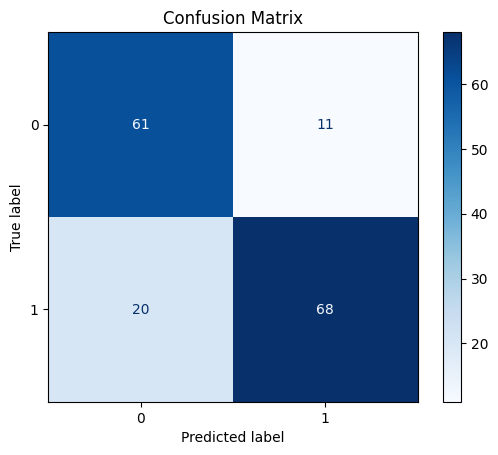

In [48]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [49]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.75      0.85      0.80        72
     Class 1       0.86      0.77      0.81        88

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



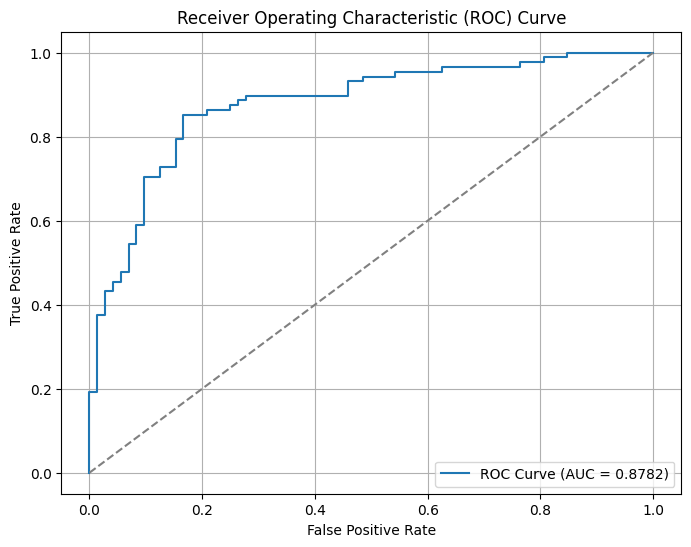

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random guess line
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()